In [1]:
import numpy as np
from math import sqrt
from scipy import *
import scipy.linalg
import sys
from numpy.linalg import eig
import matplotlib.pyplot as plt

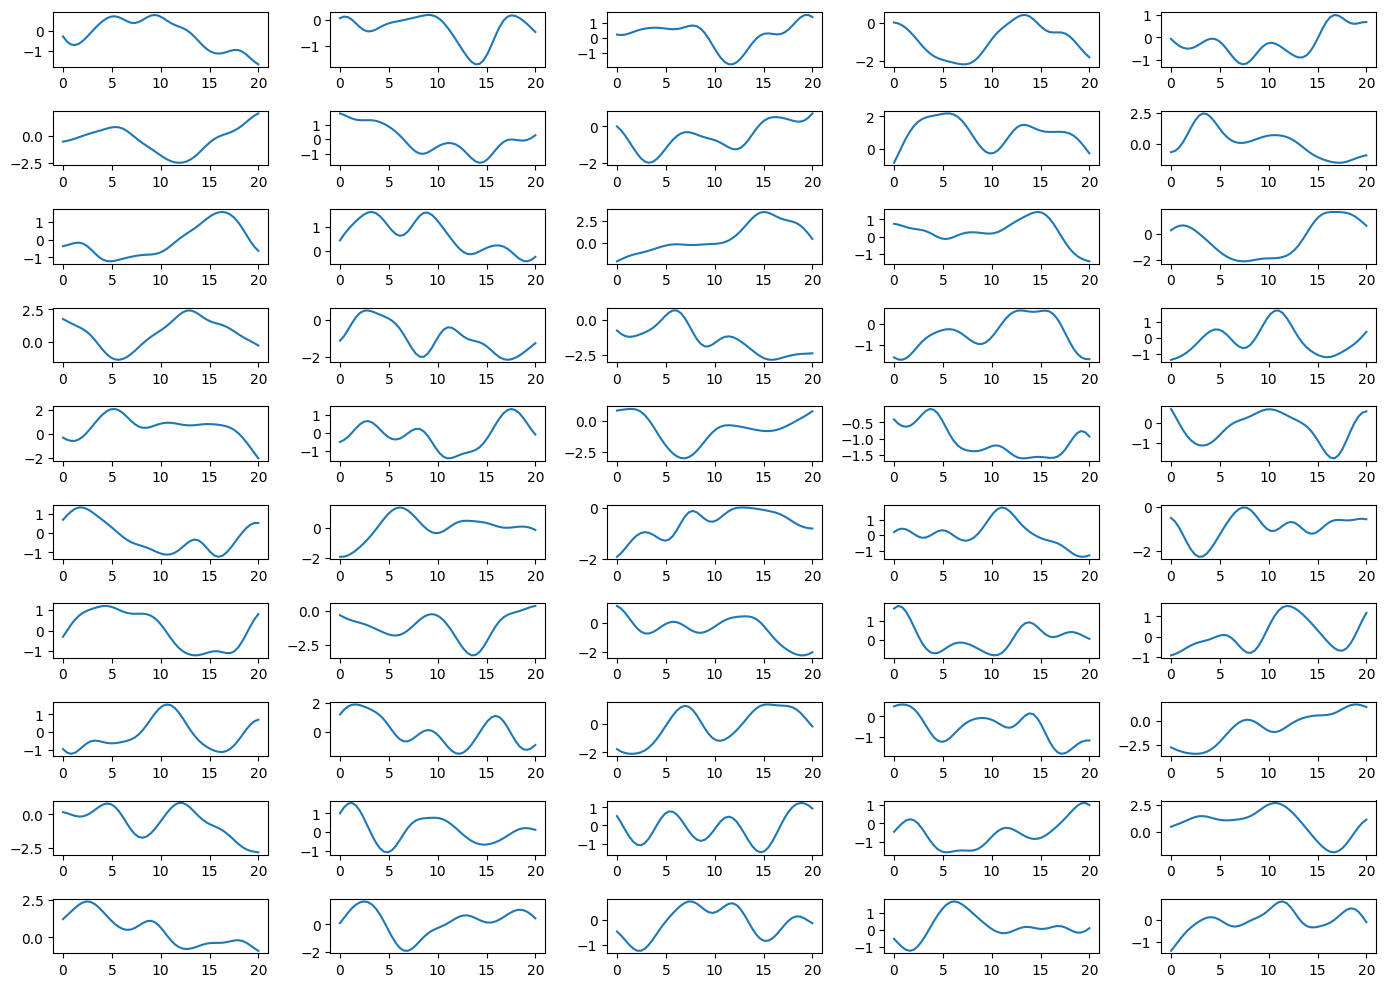

In [3]:
N=40#number of samples
K=40# number of modules
starttime = timeit.default_timer()
correlation=20
M=9
def GaussianTheta(num_seq, sigma, num_instance):
    # output is a matrix of num_instance times num_seq, each row is one instance of Theta(sequence)
    
    
    Delta = scipy.linalg.toeplitz( - np.arange(num_seq), np.arange(num_seq) )
    
    
    CovMat = np.exp( - np.power(Delta,2) / ( 2 * sigma ** 2 ) )
    
    
    eig_val, eig_vec = np.linalg.eigh(CovMat) 
    eig_val = np.maximum(eig_val, 0.0) 
    
    L = np.dot( np.sqrt(np.diag(eig_val)) , eig_vec.T )
    K = np.dot( np.random.randn( num_instance, num_seq ) , L )
    
    return K

ThetaX=np.ones((N,K,M))
for i in range(M):

    Seed=M+i
    np.random.seed(Seed)

    ThetaX[:,:,i] = GaussianTheta( K, correlation, N ) 


fig, axes = plt.subplots(10, 5, figsize=(14,10))
fig.tight_layout()
#fig.suptitle('Different trajectories for random magnetic field in terms of time',size=16, y=1.05)

 
for trajectory_index, trajectory in enumerate(B):
    axes[np.unravel_index(trajectory_index, [10, 5])].plot(taulist,trajectory)